# Matrix Factorization using Bregman Divergenses

## Testing NMF class

In [1]:
from sklearn.decomposition import NMF as nmfsk
from MatrixFactorization import NMF as nmfmy
import numpy as np
from numpy.random import RandomState
from sklearn.metrics import mean_squared_error
from math import sqrt

## 1. Poisson Distribution (with kullback-leibler as the Divergense Function To be Minimized)

### 1.1 Selecting best way to represent Poisson Distribution with Non- negative Values

Poission Distribution from definition does not take negative values since it is a discrete probability distribution. 

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


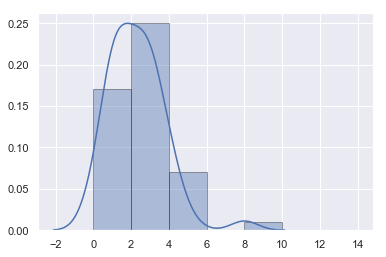

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
rs = RandomState(76321654)
l = 2
V = rs.poisson(lam = l, size = 10000).reshape(200,50)
sns.set(color_codes=True)
sns.distplot(V[4],  bins=np.arange(V[4].min(),V[4].max()) * l, hist_kws=dict(ec="k"), label = 'V')

### 1.2 Test NMF for Data coming from Poisson Distribution

In [28]:
import scipy
n = 14
poisson = scipy.stats.distributions.poisson

#### LOG Likelihood 

In [29]:
import math
def neg_log_poisson(V,W,H,l):
    
    logs_likelihoods = poisson.logpmf(np.rint(W.dot(H)),l)
    neg_logs = - logs_likelihoods
    #other = np.where(neg_logs != float('inf'))
    #inf_indices = np.where(neg_logs == float('inf'))
    #neg_logs[inf_indices] = np.max(neg_logs[other]) 
    return np.sum(neg_logs)

In [30]:
import math
from scipy.special import factorial

def neg_log_poisson(V,W,H,l):
    
    A = W.dot(H)
    
    likelihoods = (1 / factorial(V)) * np.power(A,V) * np.power(math.e,-A)
    logs_likelihoods = np.log(likelihoods)
    neg_logs = - logs_likelihoods
    
    return np.sum(neg_logs)

In [31]:
def neg_log_poisson(V,W,H,l):
    
    logs_likelihoods = poisson.logpmf(V,W.dot(H))
    neg_logs = - logs_likelihoods
    return np.sum(neg_logs)

### Sklearn Implementation

In [32]:
rs = RandomState(76321654)
nmfS = nmfsk(n_components=n,random_state=rs,solver='mu', beta_loss='kullback-leibler' )
Ws = nmfS.fit_transform(V)
Hs = nmfS.components_

diffS = neg_log_poisson(V, Ws, Hs,l)
print('Neg Log Likelihood Between Sklearn Results and V :' + str(diffS))

Neg Log Likelihood Between Sklearn Results and V :15342.407179324693


### My Implementation

In [33]:
rs = RandomState(76321654)
nmfM = nmfmy( n_components=n,random_state=rs, distribution = 'poisson')
W, H = nmfM.fit_transform(V)
diffM = neg_log_poisson(V, W, H,l)
print('Neg Log Likelihood Between My Results and V :' + str(diffM))

Neg Log Likelihood Between My Results and V :15038.51321003756


### My Implementation Gaussian

In [34]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'gaussian')
W, H = nmfM.fit_transform(V)
diffM = neg_log_poisson(V, W, H,l)
print('Neg Log Likelihood Between My Results and V :' + str(diffM))

Neg Log Likelihood Between My Results and V :15178.836212911614


### Combination of My and Sklearn

In [35]:
from MatrixFactorization import myNMF as nmfmy2
rs = RandomState(76321654)
nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'poisson')
W2 = nmfM2.fit_transform(V)
H2 = nmfM2.components_

diffM2 =neg_log_poisson(V, W2, H2,l)
print('Neg Log Likelihood Between My Results and V :' + str(diffM2))

Neg Log Likelihood Between My Results and V :15340.305897445827


### Compare the three Approaches

In [36]:
errorssk = np.zeros(50)
errorssk2 = np.zeros(50)
errorsmy = np.zeros(50)
errorsmy2 = np.zeros(50)

lsk = np.zeros(50)
lsk2 = np.zeros(50)
lmy1 = np.zeros(50)
lmy2 = np.zeros(50)



# Compare with normal 
errorsmyNormal = np.zeros(50)
lmyNormal = np.zeros(50)

for n in range(1, 51):
    rs = RandomState(76321654)
    
    # Sklearn
    nmfS = nmfsk(n_components=n,random_state=rs)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    # Sklearn with kullback-leibler
    rs = RandomState(76321654)
    nmfS2 = nmfsk(n_components=n,random_state=rs,  solver='mu', beta_loss='kullback-leibler')
    Ws2 = nmfS2.fit_transform(V)
    Hs2 = nmfS2.components_

    
    
    #My 
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n, random_state=rs,  distribution = 'poisson')
    W, H = nmfM.fit_transform(V)
    
    # My with Normal
    rs = RandomState(76321654)
    nmfMNormal = nmfmy(n_components=n,random_state=rs,  distribution = 'gaussian')
    Wnormal, Hnormal = nmfMNormal.fit_transform(V)
   
    
    #Combination
    rs = RandomState(76321654)
    nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'poisson')
    W2 = nmfM2.fit_transform(V)
    H2 = nmfM2.components_
    
    
    # Mean Squared Errors
    diffS = mean_squared_error(V, Ws.dot(Hs))
    errorssk[n-1] = diffS
    
    diffS2 = mean_squared_error(V, Ws2.dot(Hs2))
    errorssk2[n-1] = diffS2
    
    diffM = mean_squared_error(V, W.dot(H))
    errorsmy[n-1] = diffM
    
    diffMnormal = mean_squared_error(V, Wnormal.dot(Hnormal))
    errorsmyNormal[n-1] = diffMnormal
    
    diffM2 =mean_squared_error(V, W2.dot(H2))
    errorsmy2[n-1] = diffM2
    
    # Average Negative log likelihood
    diffS = neg_log_poisson(V, Ws, Hs,l)
    lsk[n-1] = diffS / (V.shape[0] * V.shape[1])
    
    diffS2 = neg_log_poisson(V, Ws2, Hs2,l)
    lsk2[n-1] = diffS2 / (V.shape[0] * V.shape[1])
    
    diffM = neg_log_poisson(V, W, H,l)
    lmy1[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    diffMNormal = neg_log_poisson(V, Wnormal, Hnormal,l)
    lmyNormal[n-1] = diffMNormal / (V.shape[0] * V.shape[1])
    
    diffM2 = neg_log_poisson(V, W2 , H2,l)
    lmy2[n-1] = diffM2 / (V.shape[0] * V.shape[1])
    

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: Convergenc

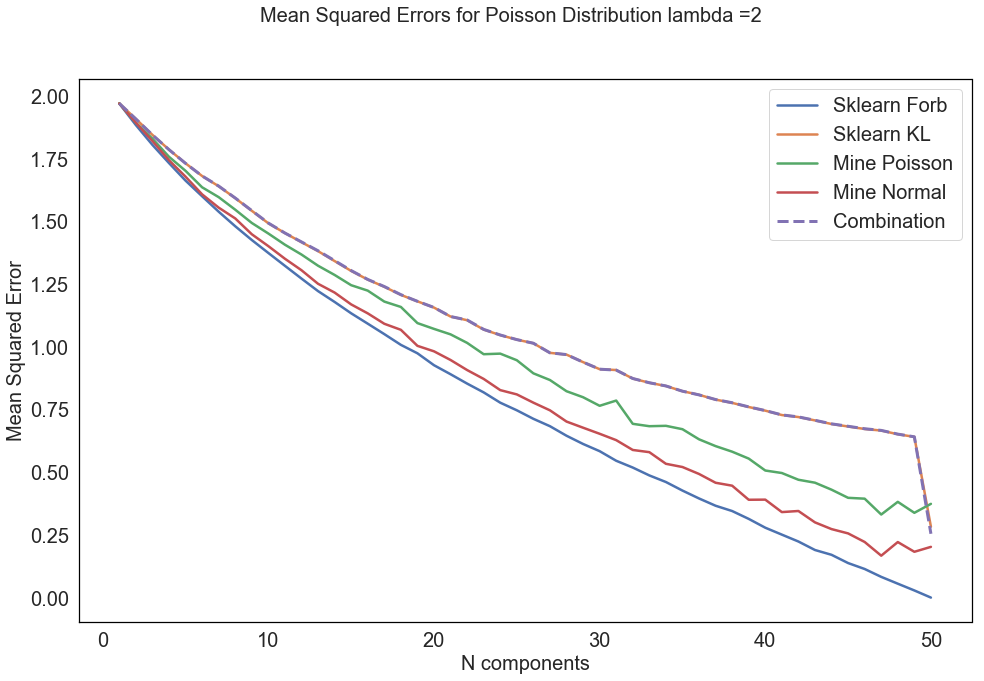

In [38]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  errorssk, label="Sklearn Forb", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorssk2, label="Sklearn KL", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorsmy, label="Mine Poisson", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorsmyNormal, label="Mine Normal", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorsmy2, label="Combination", linestyle = '--', linewidth=3)
ax_1.legend(loc=0)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Mean Squared Error')
fig_1.suptitle('Mean Squared Errors for Poisson Distribution lambda =2', fontsize = 20)
fig_1.savefig('PoissonGraphs/MeanSquaredErrorsForNMFPoisson1lambda=2.pdf')

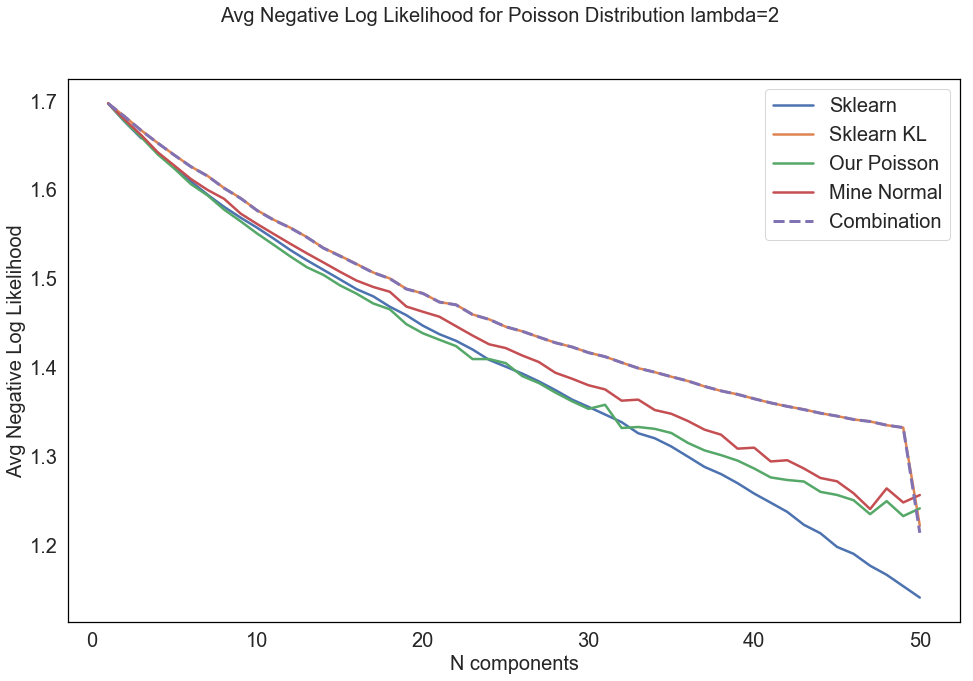

In [39]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  lsk, label="Sklearn", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lsk2, label="Sklearn KL", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lmy1, label="Our Poisson", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lmyNormal, label="Mine Normal", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lmy2, label="Combination", linestyle = '--', linewidth=3)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Poisson Distribution lambda=2',  fontsize = 20)
fig_1.savefig('PoissonGraphs/PoissonNMFAvgNegativeLogLikelihoodlmba=2.pdf')

In [40]:
l = 3
V = rs.poisson(lam = l, size = 10000).reshape(200,50)
sns.set(color_codes=True)

In [41]:
errorssk = np.zeros(50)
errorssk2 = np.zeros(50)
errorsmy = np.zeros(50)
errorsmy2 = np.zeros(50)

lsk = np.zeros(50)
lsk2 = np.zeros(50)
lmy1 = np.zeros(50)
lmy2 = np.zeros(50)



# Compare with normal 
errorsmyNormal = np.zeros(50)
lmyNormal = np.zeros(50)

for n in range(1, 51):
    rs = RandomState(76321654)
    
    # Sklearn
    nmfS = nmfsk(n_components=n,random_state=rs)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    # Sklearn with kullback-leibler
    rs = RandomState(76321654)
    nmfS2 = nmfsk(n_components=n,random_state=rs,  solver='mu', beta_loss='kullback-leibler')
    Ws2 = nmfS2.fit_transform(V)
    Hs2 = nmfS2.components_

    
    
    #My 
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n, random_state=rs,  distribution = 'poisson')
    W, H = nmfM.fit_transform(V)
    
    # My with Normal
    rs = RandomState(76321654)
    nmfMNormal = nmfmy(n_components=n,random_state=rs,  distribution = 'gaussian')
    Wnormal, Hnormal = nmfMNormal.fit_transform(V)
   
    
    #Combination
    rs = RandomState(76321654)
    nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'poisson')
    W2 = nmfM2.fit_transform(V)
    H2 = nmfM2.components_
    
    
    # Mean Squared Errors
    diffS = mean_squared_error(V, Ws.dot(Hs))
    errorssk[n-1] = diffS
    
    diffS2 = mean_squared_error(V, Ws2.dot(Hs2))
    errorssk2[n-1] = diffS2
    
    diffM = mean_squared_error(V, W.dot(H))
    errorsmy[n-1] = diffM
    
    diffMnormal = mean_squared_error(V, Wnormal.dot(Hnormal))
    errorsmyNormal[n-1] = diffMnormal
    
    diffM2 =mean_squared_error(V, W2.dot(H2))
    errorsmy2[n-1] = diffM2
    
    # Average Negative log likelihood
    diffS = neg_log_poisson(V, Ws, Hs,l)
    lsk[n-1] = diffS / (V.shape[0] * V.shape[1])
    
    diffS2 = neg_log_poisson(V, Ws2, Hs2,l)
    lsk2[n-1] = diffS2 / (V.shape[0] * V.shape[1])
    
    diffM = neg_log_poisson(V, W, H,l)
    lmy1[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    diffMNormal = neg_log_poisson(V, Wnormal, Hnormal,l)
    lmyNormal[n-1] = diffMNormal / (V.shape[0] * V.shape[1])
    
    diffM2 = neg_log_poisson(V, W2 , H2,l)
    lmy2[n-1] = diffM2 / (V.shape[0] * V.shape[1])

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: Convergenc

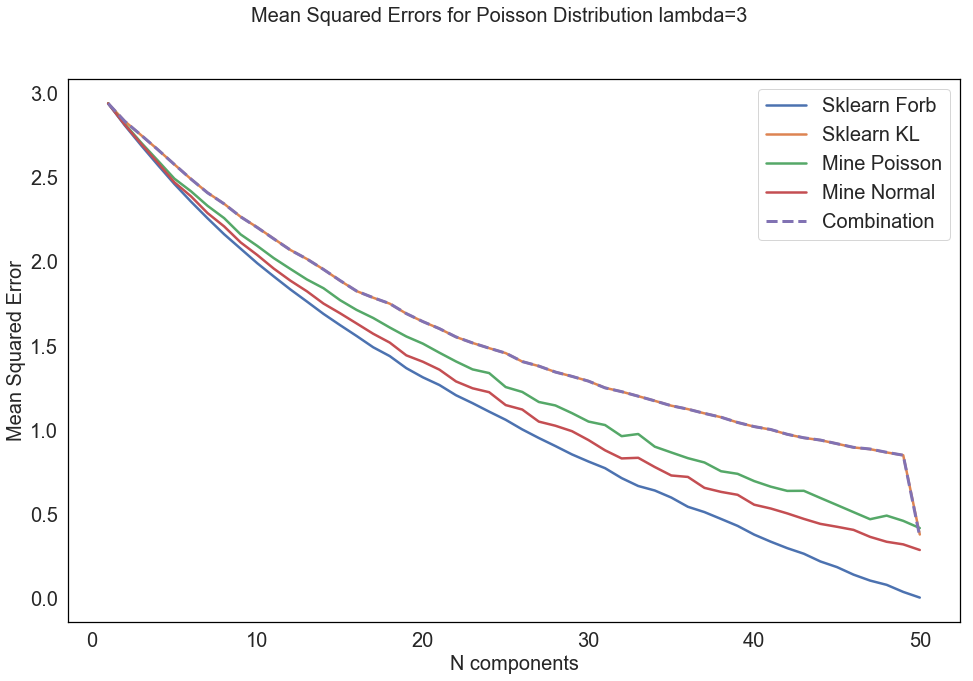

In [43]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  errorssk, label="Sklearn Forb", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorssk2, label="Sklearn KL", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorsmy, label="Mine Poisson", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorsmyNormal, label="Mine Normal", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorsmy2, label="Combination", linestyle = '--', linewidth=3)
ax_1.legend(loc=0)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Mean Squared Error')
fig_1.suptitle('Mean Squared Errors for Poisson Distribution lambda=3', fontsize = 20)
fig_1.savefig('PoissonGraphs/MeanSquaredErrorsForNMFPoisson1lambda=3.pdf')

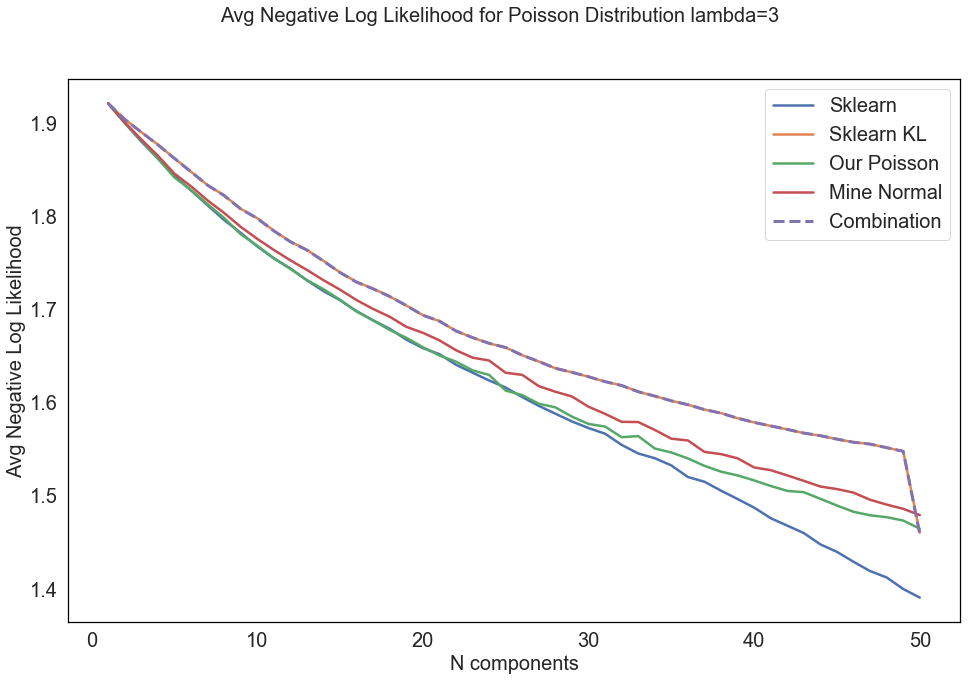

In [44]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  lsk, label="Sklearn", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lsk2, label="Sklearn KL", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lmy1, label="Our Poisson", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lmyNormal, label="Mine Normal", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lmy2, label="Combination", linestyle = '--', linewidth=3)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Poisson Distribution lambda=3',  fontsize = 20)
fig_1.savefig('PoissonGraphs/PoissonNMFAvgNegativeLogLikelihoodlmba=3.pdf')

In [45]:
l = 1
V = rs.poisson(lam = l, size = 10000).reshape(200,50)
sns.set(color_codes=True)

In [46]:
errorssk = np.zeros(50)
errorssk2 = np.zeros(50)
errorsmy = np.zeros(50)
errorsmy2 = np.zeros(50)

lsk = np.zeros(50)
lsk2 = np.zeros(50)
lmy1 = np.zeros(50)
lmy2 = np.zeros(50)



# Compare with normal 
errorsmyNormal = np.zeros(50)
lmyNormal = np.zeros(50)

for n in range(1, 51):
    rs = RandomState(76321654)
    
    # Sklearn
    nmfS = nmfsk(n_components=n,random_state=rs)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    # Sklearn with kullback-leibler
    rs = RandomState(76321654)
    nmfS2 = nmfsk(n_components=n,random_state=rs,  solver='mu', beta_loss='kullback-leibler')
    Ws2 = nmfS2.fit_transform(V)
    Hs2 = nmfS2.components_

    
    
    #My 
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n, random_state=rs,  distribution = 'poisson')
    W, H = nmfM.fit_transform(V)
    
    # My with Normal
    rs = RandomState(76321654)
    nmfMNormal = nmfmy(n_components=n,random_state=rs,  distribution = 'gaussian')
    Wnormal, Hnormal = nmfMNormal.fit_transform(V)
   
    
    #Combination
    rs = RandomState(76321654)
    nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'poisson')
    W2 = nmfM2.fit_transform(V)
    H2 = nmfM2.components_
    
    
    # Mean Squared Errors
    diffS = mean_squared_error(V, Ws.dot(Hs))
    errorssk[n-1] = diffS
    
    diffS2 = mean_squared_error(V, Ws2.dot(Hs2))
    errorssk2[n-1] = diffS2
    
    diffM = mean_squared_error(V, W.dot(H))
    errorsmy[n-1] = diffM
    
    diffMnormal = mean_squared_error(V, Wnormal.dot(Hnormal))
    errorsmyNormal[n-1] = diffMnormal
    
    diffM2 =mean_squared_error(V, W2.dot(H2))
    errorsmy2[n-1] = diffM2
    
    # Average Negative log likelihood
    diffS = neg_log_poisson(V, Ws, Hs,l)
    lsk[n-1] = diffS / (V.shape[0] * V.shape[1])
    
    diffS2 = neg_log_poisson(V, Ws2, Hs2,l)
    lsk2[n-1] = diffS2 / (V.shape[0] * V.shape[1])
    
    diffM = neg_log_poisson(V, W, H,l)
    lmy1[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    diffMNormal = neg_log_poisson(V, Wnormal, Hnormal,l)
    lmyNormal[n-1] = diffMNormal / (V.shape[0] * V.shape[1])
    
    diffM2 = neg_log_poisson(V, W2 , H2,l)
    lmy2[n-1] = diffM2 / (V.shape[0] * V.shape[1])

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: Convergenc

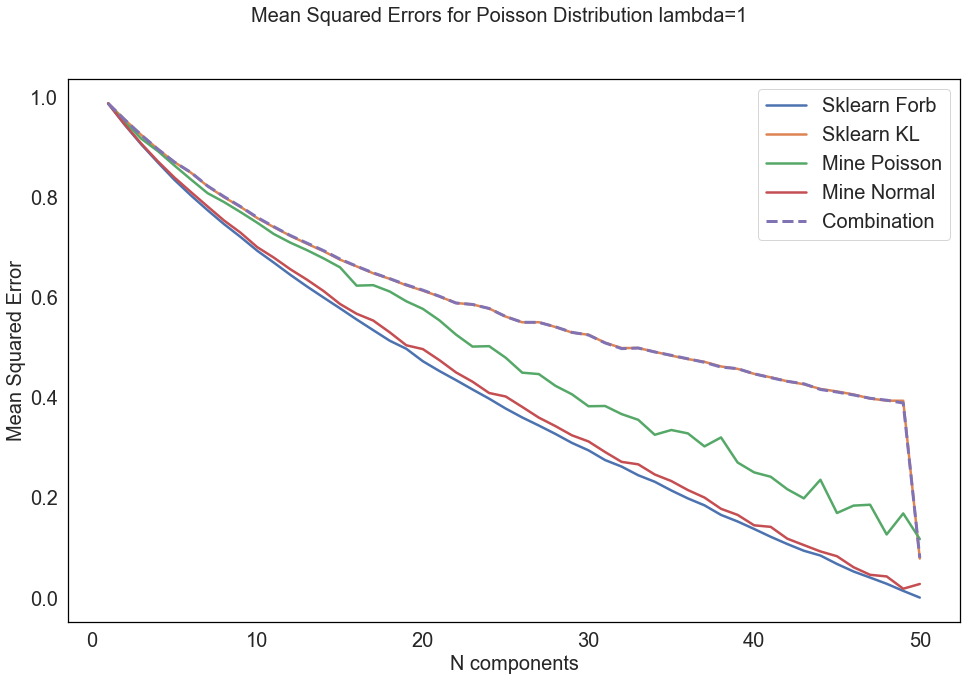

In [48]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  errorssk, label="Sklearn Forb", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorssk2, label="Sklearn KL", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorsmy, label="Mine Poisson", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorsmyNormal, label="Mine Normal", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorsmy2, label="Combination", linestyle = '--', linewidth=3)
ax_1.legend(loc=0)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Mean Squared Error')
fig_1.suptitle('Mean Squared Errors for Poisson Distribution lambda=1', fontsize = 20)
fig_1.savefig('PoissonGraphs/MeanSquaredErrorsForNMFPoisson1lambda=1.pdf')

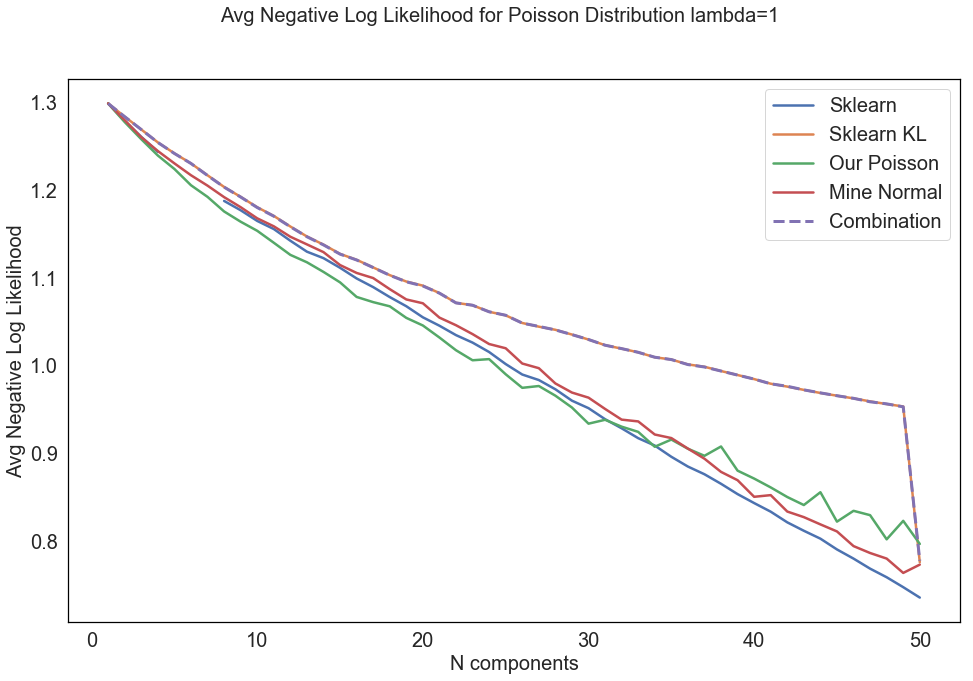

In [49]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  lsk, label="Sklearn", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lsk2, label="Sklearn KL", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lmy1, label="Our Poisson", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lmyNormal, label="Mine Normal", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lmy2, label="Combination", linestyle = '--', linewidth=3)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Poisson Distribution lambda=1',  fontsize = 20)
fig_1.savefig('PoissonGraphs/PoissonNMFAvgNegativeLogLikelihoodlmba=1.pdf')

In [50]:
l = 4
V = rs.poisson(lam = l, size = 10000).reshape(200,50)
sns.set(color_codes=True)

In [51]:
errorssk = np.zeros(50)
errorssk2 = np.zeros(50)
errorsmy = np.zeros(50)
errorsmy2 = np.zeros(50)

lsk = np.zeros(50)
lsk2 = np.zeros(50)
lmy1 = np.zeros(50)
lmy2 = np.zeros(50)



# Compare with normal 
errorsmyNormal = np.zeros(50)
lmyNormal = np.zeros(50)

for n in range(1, 51):
    rs = RandomState(76321654)
    
    # Sklearn
    nmfS = nmfsk(n_components=n,random_state=rs)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    # Sklearn with kullback-leibler
    rs = RandomState(76321654)
    nmfS2 = nmfsk(n_components=n,random_state=rs,  solver='mu', beta_loss='kullback-leibler')
    Ws2 = nmfS2.fit_transform(V)
    Hs2 = nmfS2.components_

    
    
    #My 
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n, random_state=rs,  distribution = 'poisson')
    W, H = nmfM.fit_transform(V)
    
    # My with Normal
    rs = RandomState(76321654)
    nmfMNormal = nmfmy(n_components=n,random_state=rs,  distribution = 'gaussian')
    Wnormal, Hnormal = nmfMNormal.fit_transform(V)
   
    
    #Combination
    rs = RandomState(76321654)
    nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'poisson')
    W2 = nmfM2.fit_transform(V)
    H2 = nmfM2.components_
    
    
    # Mean Squared Errors
    diffS = mean_squared_error(V, Ws.dot(Hs))
    errorssk[n-1] = diffS
    
    diffS2 = mean_squared_error(V, Ws2.dot(Hs2))
    errorssk2[n-1] = diffS2
    
    diffM = mean_squared_error(V, W.dot(H))
    errorsmy[n-1] = diffM
    
    diffMnormal = mean_squared_error(V, Wnormal.dot(Hnormal))
    errorsmyNormal[n-1] = diffMnormal
    
    diffM2 =mean_squared_error(V, W2.dot(H2))
    errorsmy2[n-1] = diffM2
    
    # Average Negative log likelihood
    diffS = neg_log_poisson(V, Ws, Hs,l)
    lsk[n-1] = diffS / (V.shape[0] * V.shape[1])
    
    diffS2 = neg_log_poisson(V, Ws2, Hs2,l)
    lsk2[n-1] = diffS2 / (V.shape[0] * V.shape[1])
    
    diffM = neg_log_poisson(V, W, H,l)
    lmy1[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    diffMNormal = neg_log_poisson(V, Wnormal, Hnormal,l)
    lmyNormal[n-1] = diffMNormal / (V.shape[0] * V.shape[1])
    
    diffM2 = neg_log_poisson(V, W2 , H2,l)
    lmy2[n-1] = diffM2 / (V.shape[0] * V.shape[1])

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: ConvergenceWarning: Maximum number of iteration 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/nmf.py:1050: Convergenc

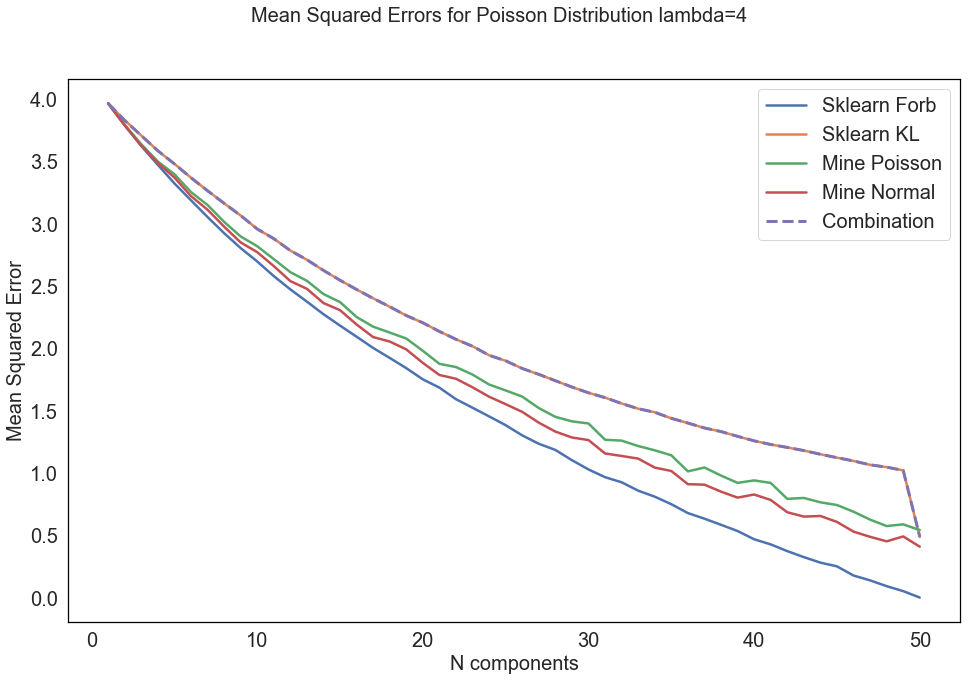

In [53]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  errorssk, label="Sklearn Forb", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorssk2, label="Sklearn KL", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorsmy, label="Mine Poisson", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorsmyNormal, label="Mine Normal", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorsmy2, label="Combination", linestyle = '--', linewidth=3)
ax_1.legend(loc=0)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Mean Squared Error')
fig_1.suptitle('Mean Squared Errors for Poisson Distribution lambda=4', fontsize = 20)
fig_1.savefig('PoissonGraphs/MeanSquaredErrorsForNMFPoisson1lambda=4.pdf')

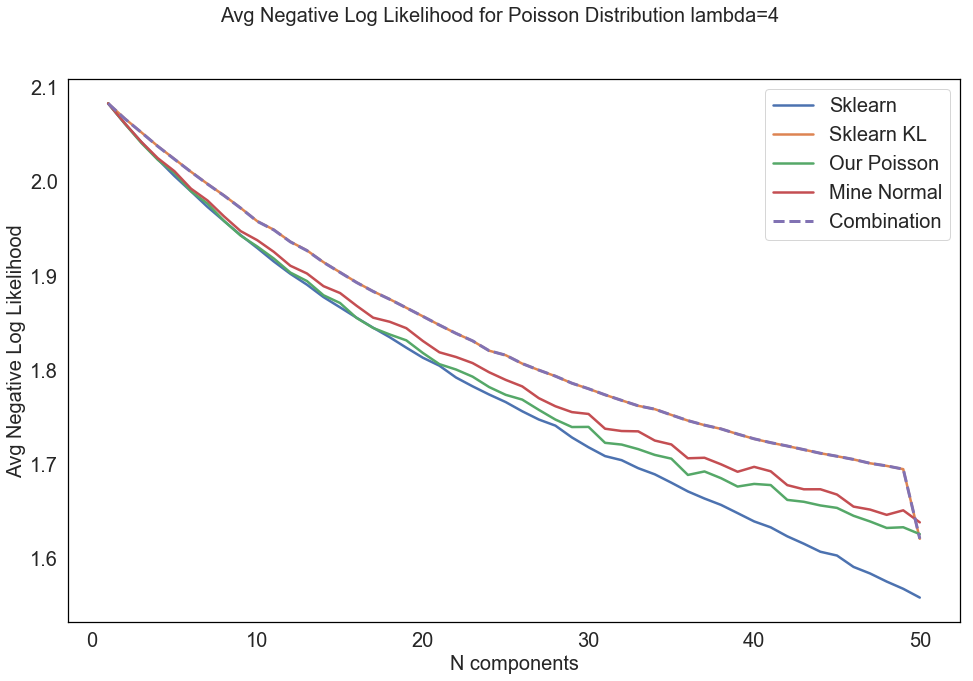

In [54]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  lsk, label="Sklearn", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lsk2, label="Sklearn KL", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lmy1, label="Our Poisson", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lmyNormal, label="Mine Normal", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lmy2, label="Combination", linestyle = '--', linewidth=3)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Poisson Distribution lambda=4',  fontsize = 20)
fig_1.savefig('PoissonGraphs/PoissonNMFAvgNegativeLogLikelihoodlmba=4.pdf')

In [56]:
l = 2
V = rs.poisson(lam = l, size = 300000).reshape(2000,150)
sns.set(color_codes=True)

In [58]:
errorssk = np.zeros(50)
errorssk2 = np.zeros(50)
errorsmy = np.zeros(50)
errorsmy2 = np.zeros(50)

lsk = np.zeros(50)
lsk2 = np.zeros(50)
lmy1 = np.zeros(50)
lmy2 = np.zeros(50)



# Compare with normal 
errorsmyNormal = np.zeros(50)
lmyNormal = np.zeros(50)

for n in range(1, 51):
    rs = RandomState(76321654)
    
    # Sklearn
    nmfS = nmfsk(n_components=n,random_state=rs)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    # Sklearn with kullback-leibler
    rs = RandomState(76321654)
    nmfS2 = nmfsk(n_components=n,random_state=rs,  solver='mu', beta_loss='kullback-leibler')
    Ws2 = nmfS2.fit_transform(V)
    Hs2 = nmfS2.components_

    
    
    #My 
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n, random_state=rs,  distribution = 'poisson')
    W, H = nmfM.fit_transform(V)
    
    # My with Normal
    rs = RandomState(76321654)
    nmfMNormal = nmfmy(n_components=n,random_state=rs,  distribution = 'gaussian')
    Wnormal, Hnormal = nmfMNormal.fit_transform(V)
   
    
    #Combination
    rs = RandomState(76321654)
    nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'poisson')
    W2 = nmfM2.fit_transform(V)
    H2 = nmfM2.components_
    
    
    # Mean Squared Errors
    diffS = mean_squared_error(V, Ws.dot(Hs))
    errorssk[n-1] = diffS
    
    diffS2 = mean_squared_error(V, Ws2.dot(Hs2))
    errorssk2[n-1] = diffS2
    
    diffM = mean_squared_error(V, W.dot(H))
    errorsmy[n-1] = diffM
    
    diffMnormal = mean_squared_error(V, Wnormal.dot(Hnormal))
    errorsmyNormal[n-1] = diffMnormal
    
    diffM2 =mean_squared_error(V, W2.dot(H2))
    errorsmy2[n-1] = diffM2
    
    # Average Negative log likelihood
    diffS = neg_log_poisson(V, Ws, Hs,l)
    lsk[n-1] = diffS / (V.shape[0] * V.shape[1])
    
    diffS2 = neg_log_poisson(V, Ws2, Hs2,l)
    lsk2[n-1] = diffS2 / (V.shape[0] * V.shape[1])
    
    diffM = neg_log_poisson(V, W, H,l)
    lmy1[n-1] = diffM / (V.shape[0] * V.shape[1])
    
    diffMNormal = neg_log_poisson(V, Wnormal, Hnormal,l)
    lmyNormal[n-1] = diffMNormal / (V.shape[0] * V.shape[1])
    
    diffM2 = neg_log_poisson(V, W2 , H2,l)
    lmy2[n-1] = diffM2 / (V.shape[0] * V.shape[1])

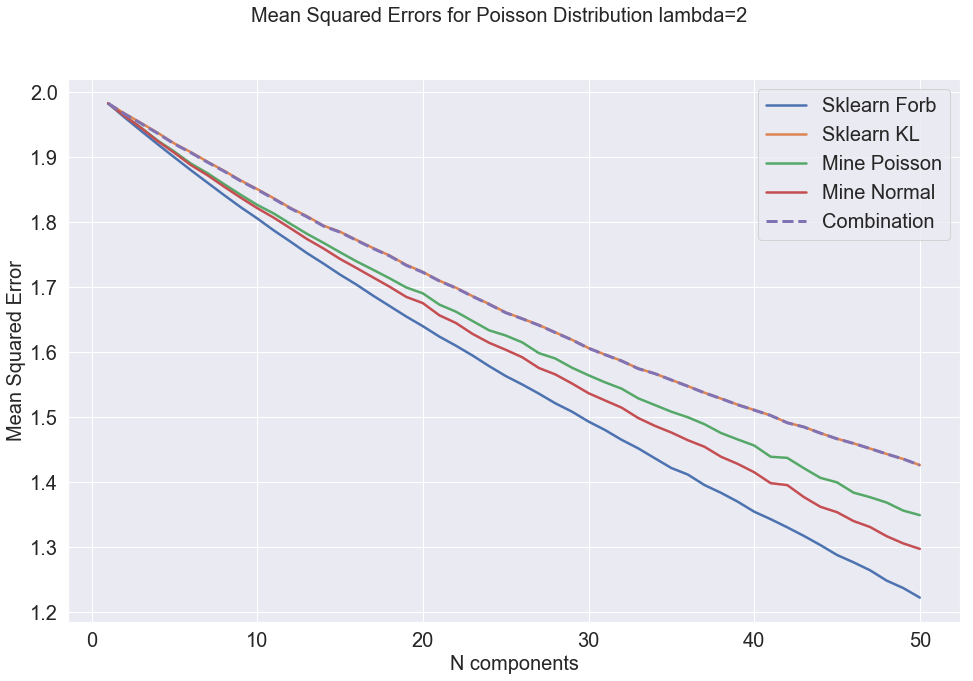

In [59]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  errorssk, label="Sklearn Forb", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorssk2, label="Sklearn KL", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorsmy, label="Mine Poisson", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorsmyNormal, label="Mine Normal", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  errorsmy2, label="Combination", linestyle = '--', linewidth=3)
ax_1.legend(loc=0)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Mean Squared Error')
fig_1.suptitle('Mean Squared Errors for Poisson Distribution lambda=2', fontsize = 20)
fig_1.savefig('PoissonGraphs/MeanSquaredErrorsForNMFPoisson1lambda=2rows=2000columns=150.pdf')

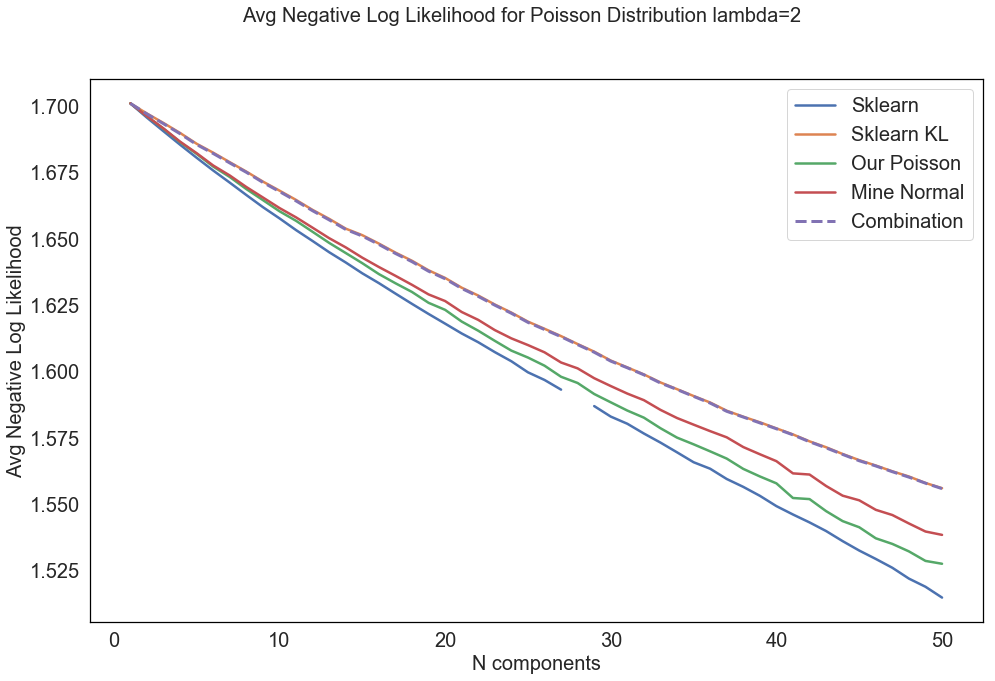

In [60]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    
ax_1.plot(np.arange(1, 51), 
                  lsk, label="Sklearn", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lsk2, label="Sklearn KL", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lmy1, label="Our Poisson", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lmyNormal, label="Mine Normal", linewidth=2.5)
ax_1.plot(np.arange(1, 51), 
                  lmy2, label="Combination", linestyle = '--', linewidth=3)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('N components')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Poisson Distribution lambda=2',  fontsize = 20)
fig_1.savefig('PoissonGraphs/PoissonNMFAvgNegativeLogLikelihoodlmba=2rows=2000columns=150.pdf')

In [61]:
l = 2
V = rs.poisson(lam = l, size = 10000).reshape(200,50)
sns.set(color_codes=True)

In [62]:
n = 10

#### Distribution compared to Sklearn with 10 components

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Original Data mean: 2.012 std: 1.4219901546775913
Tansformation Data : 2.031859866753882 std: 0.7615469046886282


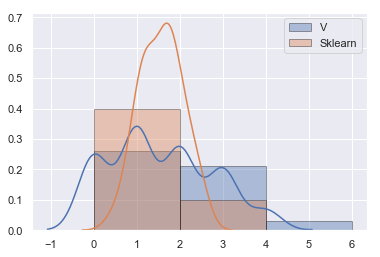

In [63]:
rs = RandomState(76321654)
nmfS = nmfsk(n_components=n,random_state=rs)
Ws = nmfS.fit_transform(V)
Hs = nmfS.components_
sns.set(color_codes=True)
sns.distplot(V[10], bins=np.arange(V[10].min(),V[10].max()) * l, hist_kws=dict(ec="k"), label = 'V')
sns.distplot(Ws.dot(Hs)[10], bins=np.arange(V[10].min(),V[10].max()) * l, hist_kws=dict(ec="k"), label = 'Sklearn')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(Ws.dot(Hs).mean()) + ' std: ' + str(Ws.dot(Hs).std()) )

#### Distribution compared to Mine with 10 components

Original Data mean: 2.012 std: 1.4219901546775913
Tansformation Data : 2.0119999999999996 std: 0.7779062490531912


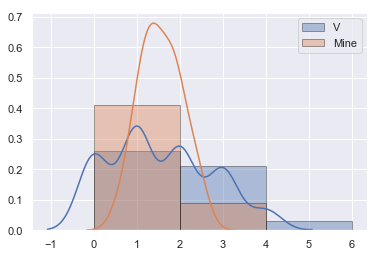

In [64]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'poisson')
W, H = nmfM.fit_transform(V)
bins = (V.max() - V.min())
sns.set(color_codes=True)
sns.distplot(V[10], bins=np.arange(V[10].min(),V[10].max()) * l, hist_kws=dict(ec="k"),  label = 'V')
sns.distplot(W.dot(H)[10], bins=np.arange(V[10].min(),V[10].max()) * l, hist_kws=dict(ec="k"),  label = 'Mine')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(W.dot(H).mean()) + ' std: ' + str(W.dot(H).std()) )

#### Distribution compared to Mine with 10 components with Normal

Original Data mean: 2.012 std: 1.4219901546775913
Tansformation Data : 2.0310921483977897 std: 0.7527792833227958


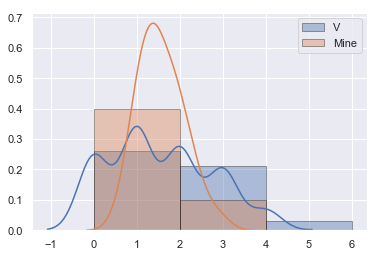

In [65]:
rs = RandomState(76321654)
nmfM = nmfmy(n_components=n,random_state=rs, distribution = 'gaussian')
W, H = nmfM.fit_transform(V)
bins = (V.max() - V.min())
sns.set(color_codes=True)
sns.distplot(V[10], bins=np.arange(V[10].min(),V[10].max()) * l, hist_kws=dict(ec="k"),  label = 'V')
sns.distplot(W.dot(H)[10], bins=np.arange(V[10].min(),V[10].max()) * l, hist_kws=dict(ec="k"), label = 'Mine')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(W.dot(H).mean()) + ' std: ' + str(W.dot(H).std()) )

#### Distribution compared to Combination with 10 components

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Original Data mean: 2.012 std: 1.4219901546775913
Tansformation Data : 2.012 std: 0.7249019025522643


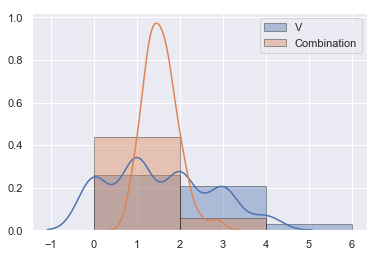

In [66]:
from MatrixFactorization import myNMF as nmfmy2
rs = RandomState(76321654)
nmfM2 = nmfmy2(n_components=n,random_state=rs, distribution = 'poisson')
W2 = nmfM2.fit_transform(V)
H2 = nmfM2.components_
sns.set(color_codes=True)
sns.distplot(V[10],bins=np.arange(V[10].min(),V[10].max()) * l, hist_kws=dict(ec="k"), label = 'V')
sns.distplot(W2.dot(H2)[10], bins=np.arange(V[10].min(),V[10].max()) * l, hist_kws=dict(ec="k"), label = 'Combination')
plt.legend()
print('Original Data mean: ' + str(V.mean()) + ' std: ' + str(V.std()) )
print('Tansformation Data : ' + str(W2.dot(H2).mean()) + ' std: ' + str(W2.dot(H2).std()) )

In [67]:
max_iterations = np.arange(1,101)

errorsmy = np.zeros(100)
lmy = np.zeros(100)

errorsmyComb = np.zeros(100)
lmyComb = np.zeros(100)

n = 10
for max_it in max_iterations:
    
    rs = RandomState(76321654)
    
   
    #My 
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, max_iterations = max_it, distribution = 'poisson')
    W, H = nmfM.fit_transform(V)
    
    #Combination
    rs = RandomState(76321654)
    nmfM2 = nmfmy2(n_components=n,random_state=rs, max_iter = max_it, distribution = 'poisson')
    W2 = nmfM2.fit_transform(V)
    H2 = nmfM2.components_
   
    
    # Mean Squared Errors 
    
    diffM = mean_squared_error(V, W.dot(H))
    errorsmy[max_it-1] = diffM
    
    # Average Neg Log Likelihoods
    
    diffM = neg_log_poisson(V, W, H,l)
    lmy[max_it-1] = diffM / (V.shape[0] * V.shape[1])
    
     # Mean Squared Errors 
    
    diffM2 = mean_squared_error(V, W2.dot(H2))
    errorsmyComb[max_it-1] = diffM2
    
    # Average Neg Log Likelihoods
    
    diffM2 = neg_log_poisson(V, W2, H2,l)
    lmyComb[max_it-1] = diffM2 / (V.shape[0] * V.shape[1])
    
    

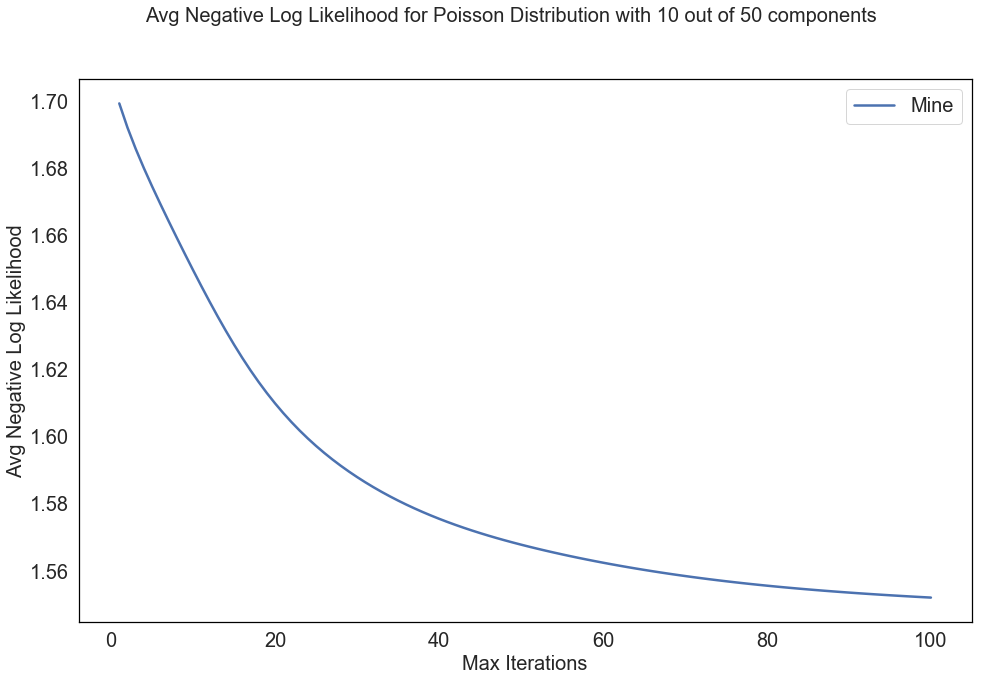

In [72]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    

ax_1.plot(max_iterations, 
                  lmy, label="Mine", linewidth=2.5)

#ax_1.plot(max_iterations, 
#                  lmyComb, label="Combination", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('Max Iterations')
ax_1.set_ylabel('Avg Negative Log Likelihood')
fig_1.suptitle('Avg Negative Log Likelihood for Poisson Distribution with 10 out of 50 components', fontsize = 20)
fig_1.savefig('PoissonGraphs/AverageProbabilityNMFPoissonMaxIterations.pdf')

### Check If Bregman Divergences Deacreses

In [69]:
def bregman_div(V,W,H,N):
    
    A = W.dot(H) 
    
   
   
    first_part = np.multiply(V, np.log( np.divide(V, A) + 1e-5 )) 
    
    
    second_part = -V+A
    breg = first_part + second_part
    
    breg[np.where(np.isnan(breg))] = np.nanmax(breg)
    
    total = np.sum(breg)
    
    return total

In [70]:
max_iterations = np.arange(1,101)

bregMy = np.zeros(100)
bregSK = np.zeros(100)
bregComb = np.zeros(100)


n = 10
for max_it in max_iterations:
    
    rs = RandomState(76321654)
    
   
    #My 
    rs = RandomState(76321654)
    nmfM = nmfmy(n_components=n,random_state=rs, max_iterations = max_it, distribution = 'poisson', phi_update = True)
    W, H = nmfM.fit_transform(V)
    
    #My Comb
    rs = RandomState(76321654)
    nmfM = nmfmy2(n_components=n,random_state=rs, max_iter = max_it, distribution = 'poisson')
    W2 = nmfM.fit_transform(V)
    H2 = nmfM.components_
    
    # Sklearn
    rs = RandomState(76321654)
    nmfS = nmfsk(n_components=n,random_state=rs, max_iter = max_it)
    Ws = nmfS.fit_transform(V)
    Hs = nmfS.components_
    
    # Bregman Divergence Error Comb
    
    bregComb[max_it-1] = bregman_div(V, W2, H2,l)
    
    # Bregman Divergence Error My
    
    bregMy[max_it-1] = bregman_div(V, W, H,l)
    
     # Bregman Divergence Error Sklearn
    
    bregSK[max_it-1] = bregman_div(V, Ws, Hs,l)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.

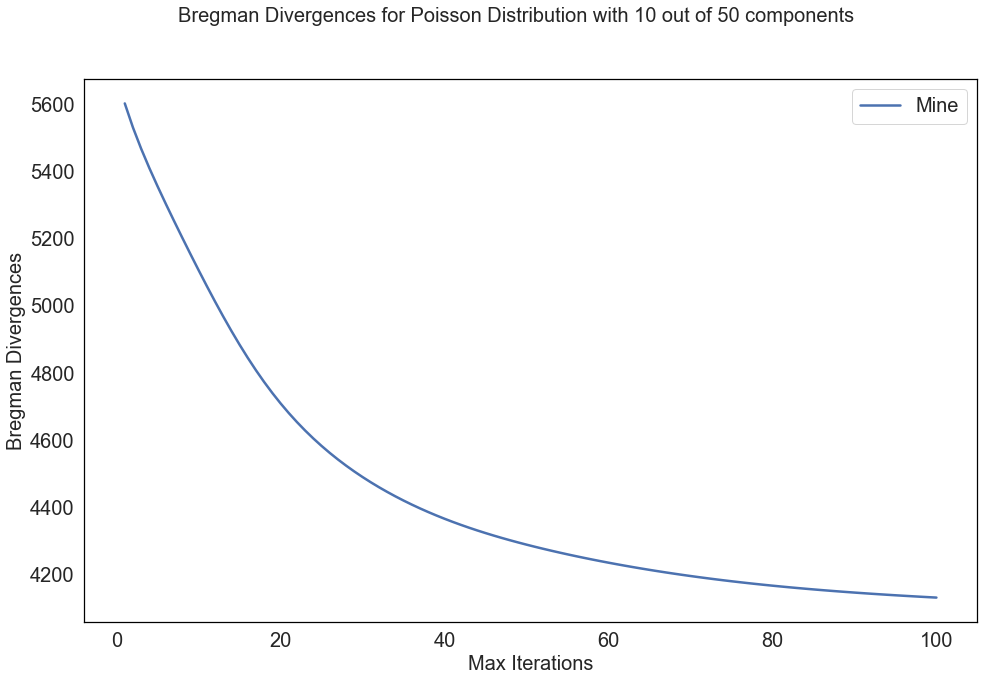

In [71]:
fig_1 = plt.figure(figsize=(16, 10))
ax_1 = fig_1.add_subplot(111)
    

ax_1.plot(max_iterations, 
                  bregMy, label="Mine", linewidth=2.5)

#ax_1.plot(max_iterations, 
#                  bregComb, label="Combination", linewidth=2.5)

#ax_1.plot(max_iterations, 
#                  bregSK, label="SKlearn", linewidth=2.5)

for item in ([ax_1.title, ax_1.xaxis.label, ax_1.yaxis.label] +
             ax_1.get_xticklabels() + ax_1.get_yticklabels()):
    item.set_fontsize(20)
    
ax_1.legend(loc=0, fontsize = 20)
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['axes.edgecolor'] = 'black'

ax_1.set_xlabel('Max Iterations')
ax_1.set_ylabel('Bregman Divergences')
fig_1.suptitle('Bregman Divergences for Poisson Distribution with 10 out of 50 components', fontsize = 20)
fig_1.savefig('PoissonGraphs/AverageProbabilityNMFPoissonMaxIterationsFurtherBregman.pdf')